# 02806 Final Project
## Civilians at the Crossroads: The Human Cost of Conflict in the Black Sea Region
### Group 64:
- **Lukas Rasocha** (s233498)
- **Md Jahidul Islam** (s240010)
- **Ting-Hui Cheng** (s232855)

<center><img src="./assets/blacksearegion.jpeg" alt="drawing" width="850"/></center>

## 1. Motivation.
#### What is your dataset?

The dataset contains all political violence events, demonstration events, and strategic developments recorded in Ukraine and the Black Sea from the beginning of ACLED coverage in 2018 to the present. ([ACLED](https://acleddata.com/data-export-tool/)).

It contains information about the region, fatalities, population data, and event specifics related to conflicts, such as the date, location, and type of event.

In total, it consists of 151159 recorded conflicts each having 35 distinct attributes.

#### Why did you choose this/these particular dataset(s)?

We wanted to tell a story about the conflicts and their evolvement in Ukraine and the Black Sea region, more specifically we wanted to show how these conflicts affect the people living in this region. The dataset served as a perfect foundation for this story for couple of reasons:

**Relevance to Current Events**: The dataset contains political violence and demonstration events in Ukraine and the Black Sea region from 2018 to 2024 which is highly relevant given the ongoing geopolitical tensions in the area. This relevance makes the data especially valuable for understanding the impacts and dynamics of these conflicts.

**Richness of Data**: The dataset contains a wide range of attributes, including information about the actors involved, the type of events, the location, and the number of fatalities. This richness of data allows for a detailed analysis of the conflicts in the region.

**Availability of Data**: The dataset's accessibility and the structured format enabled us to dive straight into the analysis and not spend time with for example scraping or extensive cleaning.

#### What was your goal for the end user's experience?

The primary goals for the end user's experience were designed to be informative, engaging, and easy to grasp. We wanted to provide an overview of the impact of conflicts in Ukraine and the Black Sea region, including the actors involved, the types of events, and the number of fatalities, while making sure the information is available and understandable to general audience. To achieve these goals, we focused on creating interactive visualizations that allow users to explore the data themselves and gain insights into the dynamics of the conflicts. We also aimed to provide context and background information to help users understand the significance of the events and their implications for the region.

Another goal was to create an emotional impact. Through telling the stories of fatalities and the mapping of events close to populated areas, we aimed to convey the human cost of the conflicts, creating a deeper emotional connection and empathy among the audience towards the affected populations.

## 2. Basic stats. Let's understand the dataset better
### Libraries 

In [460]:
import numpy as np
import calplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt, log


import nx_altair as nxa
import networkx as nx


import json
import altair as alt
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd

#### Write about your choices in data cleaning and preprocessing

We have several files for this data analysis and visualization project, with our primary focus on data.csv. Since there are no outliers in the years, duplicate events, or missing data for the attributes we intend to analyze further (such as Latitude, Event Type, Fatalities, Actor, and etc.), we will not perform any cleaning on these aspects


In [461]:
data = pd.read_csv("data.csv", delimiter=';')

# Outlier: The data convering time from 2018 till 2024. Any 'YEAR' outside this range is outlier
print('Exist outliers:', ((data['YEAR'] < 2018) | (data['YEAR'] > 2024)).any())
# Duplicate: No two rows should be identical.
print('Exist duplicate:', data.duplicated().any())
# Missing data: No Nan value in attributes latitude, longitude, event type, sub event type, fatalities, actor1
print('Exist missing data:', (data['LATITUDE'].isna() | data['LONGITUDE'].isna() | data['EVENT_TYPE'].isna() | data['SUB_EVENT_TYPE'].isna() | data['FATALITIES'].isna() | data['ACTOR1'].isna()).any())

Exist outliers: False
Exist duplicate: False
Exist missing data: False


For preprocessing, we:
1. Parse dates by converting 'EVENT_DATE' to a datetime format. This aids in time series analysis and chronological sorting.
2. Correct delimiters by ensuring 'LATITUDE' and 'LONGITUDE' are converted to numeric types, which is essential for geographical analysis.


In [462]:
def data_preprocessing(data):
    # Convert event date to datetime format
    data['EVENT_DATE'] = pd.to_datetime(data['EVENT_DATE'])
    # Convert lat, lon to correct delimiter 
    data['LATITUDE'] = pd.to_numeric(data['LATITUDE'].str.replace(',', '.'), errors='coerce')
    data['LONGITUDE'] = pd.to_numeric(data['LONGITUDE'].str.replace(',', '.'), errors='coerce')
    
    return data
data = data_preprocessing(data)

#### Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

In our dataset, there are 151,159 rows and 35 attributes. The tables below display the summary statistics of key attributes crucial for our analysis.

In [463]:
import numpy as np

def Std(x):
    return round(x.std(), 2)
def Mean(x):
    return round(x.mean(), 2)
data.agg(
    {
        'YEAR': ["min", "max", "median"],
        'LATITUDE': ["min", "max", "median", Mean],
        'LONGITUDE': ["min", "max", "median", Mean],
        'FATALITIES': ["min", "max", "median", Mean, Std],
    }
)

,YEAR,LATITUDE,LONGITUDE,FATALITIES
min,2018.0,41.162,22.163,0.00
max,2024.0,52.341,40.132,600.00
median,2022.0,48.249,37.669,0.00
Mean,NaN,48.440,36.570,0.46
Std,NaN,NaN,NaN,6.16


The earliest year recorded is 2018, and the latest is 2024. Geographically, the events span latitudes from 41.162 to 52.341 and longitudes from 22.163 to 40.132. While most recorded events had zero fatalities, underscoring a general trend of non-lethal outcomes, there were still some incidents with high fatalities, reaching a maximum of 600. This stark contrast underscores the potential severity of such events.

In [464]:
# Calculate frequencies
print("Frequency of each category in 'EVENT_TYPE':")
print(data['EVENT_TYPE'].value_counts())

print("\nFrequency of top five category in 'SUB_EVENT_TYPE':")
print(data['SUB_EVENT_TYPE'].value_counts()[:5])

print("\nFrequency of top five category in 'ACTOR1':")
print(data['ACTOR1'].value_counts()[:6])

Frequency of each category in 'EVENT_TYPE':
EVENT_TYPE
Explosions/Remote violence    96064
Battles                       39656
Strategic developments         7909
Protests                       5799
Violence against civilians     1308
Riots                           423
Name: count, dtype: int64

Frequency of top five category in 'SUB_EVENT_TYPE':
SUB_EVENT_TYPE
Shelling/artillery/missile attack    84334
Armed clash                          38983
Air/drone strike                     10202
Disrupted weapons use                 6353
Peaceful protest                      5645
Name: count, dtype: int64

Frequency of top five category in 'ACTOR1':
ACTOR1
Military Forces of Russia (2000-)              72079
Military Forces of Ukraine (2019-)             26435
NAF: United Armed Forces of Novorossiya        20614
Military Forces of Ukraine (2014-2019)         12229
Military Forces of Russia (2000-) Air Force     9565
Protesters (Ukraine)                            5750
Name: count, dtype: int6

The frequencies observed in the 'EVENT_TYPE' and 'SUB_EVENT_TYPE' categories underscore the dominant types of events and actions recorded in our dataset. With 'Explosions/Remote violence' leading the 'EVENT_TYPE' category at 96,064 occurrences and 'Shelling/artillery/missile attack' topping the 'SUB_EVENT_TYPE' list with 84,334 instances. In the 'ACTOR1', the most frequent initiators of these incidents are 'Military Forces of Russia (2000-)' with 72,079 occurrences, followed by 'Military Forces of Ukraine (2019-)' with 26,435 occurrences. 

According to the statistical results, we aim to conduct further analysis in the following areas:
1. Examining the trend of fatalities over time.
2. Investigating the trend of event types over time.
3. Exploring correlations between different event types.
4. Analyzing the distribution of sub-event types within the dataset.
5. Mapping the distribution of incidents geographically.
6. Identifying temporal trends of incidents.
7. Understanding the temporal distribution of initial actors and their relationships.

## 3. Data Analysis

#### Describe your data analysis and explain what you've learned about the dataset.
1. Examining the trend of fatalities over time.

The calendar plot of fatalities from 2018 to 2024 provides a visual summary of fatality occurrences over time, with each row representing a year and columns delineating months. While there are no evident consistent seasonal trends across the years, isolated months in certain years such as May and July show peaks in fatalities. High-fatality days do not follow a clear pattern related to specific days of the week, suggesting randomness in the occurrence of these events. The plot also reveals periods, notably in 2024, with few to no fatalities, indicating times of relative calm. 

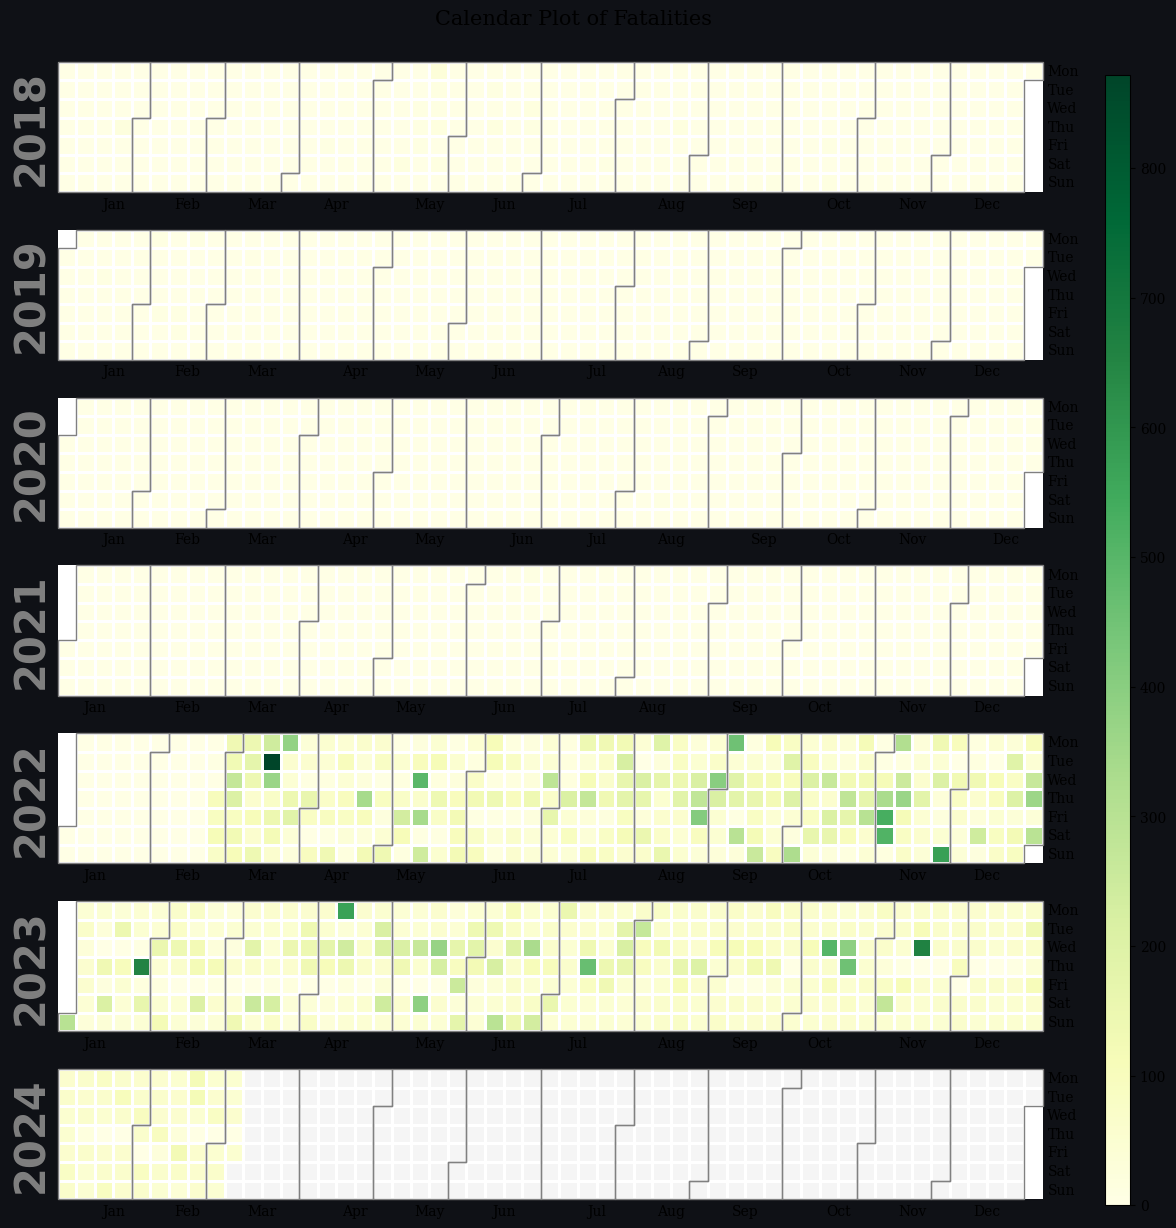

In [465]:
# Show the distribution of Fatalities over years
fatalities_by_date = data.groupby('EVENT_DATE')['FATALITIES'].sum()
# Create the calendar heatmap plot
calplot.calplot(fatalities_by_date, cmap='YlGn', colorbar=True,
                suptitle='Calendar Plot of Fatalities',
                suptitle_kws={'fontsize': 15},
                yearlabel_kws={'fontname':'DejaVu Sans'})

plt.show()

2. Investigating the trend of event types over time.

The bar chart illustrating the distribution of event types from 2018 to 2024 reveals notable fluctuations in conflict-related activities. Notably, there is a sharp increase in explosions/remote violence, peaking in 2022 (It's important to note that the dataset only includes data up to March 2024, indicating ongoing conflict). Battles, which were previously the most common event type, experienced a slight decrease during 2020 and 2021 but rose again thereafter. The overall increase in events after 2022 suggests a growing intensity in conflict or significant escalations.

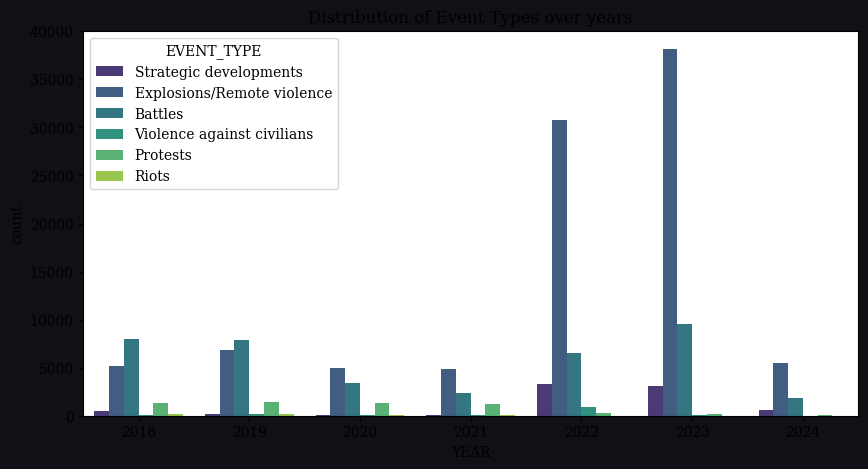

In [466]:
# Show the distribution of each individual event type over years
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=data, x='YEAR', hue='EVENT_TYPE', palette='viridis')
plt.title("Distribution of Event Types over years")
plt.show()

3. Exploring correlations between different event types.

According to the correlation matrix, there is a strong positive correlation between strategic developments and explosions/remote violence, indicating that these events frequently co-occur. However, there are no strong correlations observed between any other pair of events.

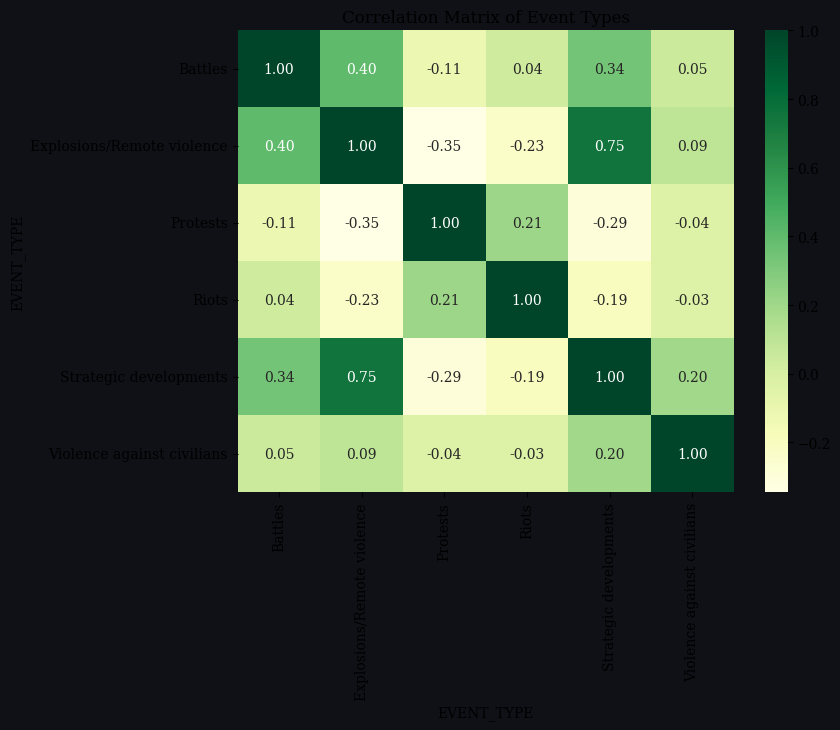

In [467]:
hourly_counts = data.groupby(['EVENT_TYPE', 'EVENT_DATE']).size().reset_index(name="counts")
hourly_counts

# Pivot the table so each event type becomes a column
pivot_data = hourly_counts.pivot_table(index='EVENT_DATE', columns='EVENT_TYPE', values='counts', fill_value=0)

# Calculate the correlation matrix for the event types
correlation_matrix = pivot_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlGn', cbar=True)
plt.title('Correlation Matrix of Event Types')
plt.show()

4. Analyzing the distribution of sub-event types within the dataset.

The polar chart provides a comprehensive visualization of the frequency of various incident sub-types, plotted on a logarithmic scale to effectively manage the wide range of values. The chart highlights that certain violent activities, such as "Shelling/artillery/missile attack", "Armed clash", and "Air/drone strike", dominate in frequency, indicating their common occurrence in conflict scenarios. Despite being less frequent, events like "Peaceful protest" and "Disrupted weapons use" still stand out significantly compared to all other sub-events in the dataset.

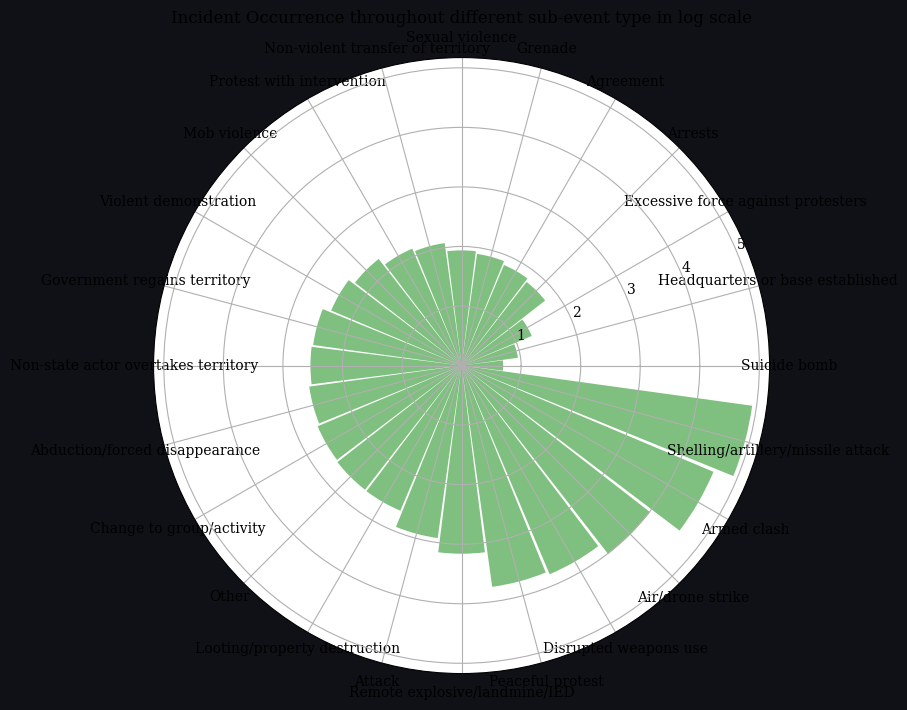

In [468]:
# Assuming 'Category' column contains the categories of incidents
# Count the number of incidents for each category
incident_counts = data['SUB_EVENT_TYPE'].value_counts()

# Sort the categories and corresponding incident counts in descending order
incident_counts = incident_counts.sort_values()

# Extract categories and incident counts
categories = incident_counts.index.tolist()
values = incident_counts.values.tolist()

# Convert values to radians
theta = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()

# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
ax.bar(theta,np.log10(values) , width=1.9 * np.pi / len(values), color='green', alpha=0.5)

# Set the location of the angular labels
ax.set_xticks(np.arange(len(categories)) * (2 * np.pi) / len(categories))
ax.set_xticklabels(categories)

plt.title('Incident Occurrence throughout different sub-event type in log scale')
plt.show()


5. Mapping the distribution of incidents geographically.

This heatmap highlights the concentration of activity across various geographical locations in Ukraine and the Black Sea region. The data points are most densely clustered in the central and eastern parts of Ukraine, indicating significant unrest or conflict activity, especially in areas likely of strategic or economic importance. Notably, the presence of a singular bright yellow data point in the upper central region stands out against the broader distribution. This intense concentration suggests particularly significant events or ongoing conflict focal point, warranting further investigation.

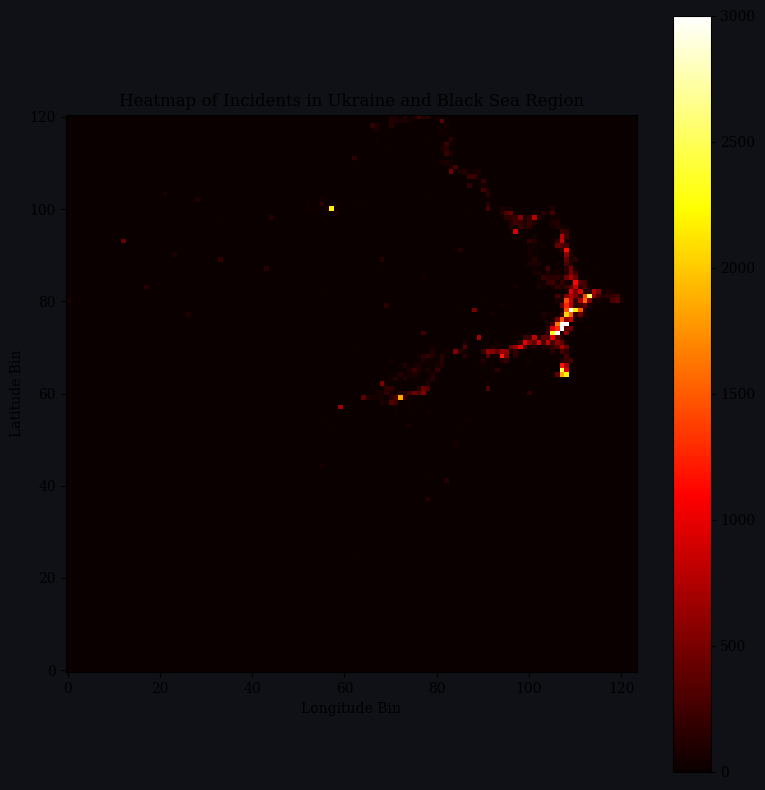

In [469]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

data['LATITUDE'] = pd.to_numeric(data['LATITUDE'], errors='coerce')
data['LONGITUDE'] = pd.to_numeric(data['LONGITUDE'], errors='coerce')

# Remove outliers
df = data[(data['LATITUDE'] > 40) & (data['LONGITUDE'] > 20)]  # Adjusted for typical longitude range

# Get the max and min of lat, lon to find out the how many bin needed
lat_min = df.LATITUDE.min()
lat_max = df.LATITUDE.max()
lon_min = df.LONGITUDE.min()
lon_max = df.LONGITUDE.max()

lat_bin = haversine(lon_min, lat_max, lon_max, lat_max)/10
lon_bin = haversine(lon_min, lat_min, lon_min, lat_max)/10

count, _, _ = np.histogram2d(df.LATITUDE, df.LONGITUDE, bins = [int(lat_bin), int(lon_bin)])

plt.figure(figsize=(8,8))
plt.imshow(count, cmap='hot',vmax=3000, origin='lower')
plt.title('Heatmap of Incidents in Ukraine and Black Sea Region')
plt.ylabel('Latitude Bin')
plt.xlabel('Longitude Bin')
plt.colorbar()
plt.tight_layout()
plt.savefig("heat_map.png")

6. Identifying temporal trends of incidents.
 
On Wednesdays and Thursdays, consistently high incident numbers are observed. In particular, August sees peaks on Wednesdays, while Thursdays peak in September. Incident counts tend to decrease on weekends, with the lowest numbers often occurring on Sundays and Fridays. Notably, relative lower activity levels are observed in April and December,  with both Sundays showing the lowest values.

/var/folders/1g/nb69w5095276sxhrps7sndf80000gn/T/ipykernel_22665/2686056124.py:15: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



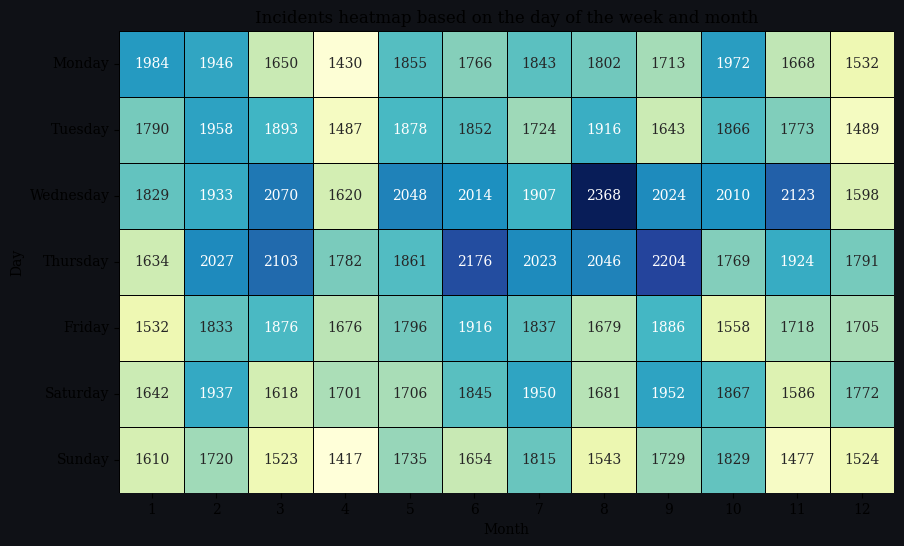

In [470]:
Weekdate = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Extract day, month, and year
data['DAY'] = data['EVENT_DATE'].dt.day
data['MONTH'] = data['EVENT_DATE'].dt.month

# Group by day, month, and year and count incidents
daily_counts = data.groupby(['YEAR', 'MONTH', 'DAY']).size().reset_index(name='Incidents')

# Create a new column for the day of the week and in order
daily_counts['DayOfWeek'] = pd.to_datetime(daily_counts[['YEAR', 'MONTH', 'DAY']]).dt.day_name()
daily_counts['DayOfWeek'] = pd.Categorical(daily_counts['DayOfWeek'], categories=Weekdate, ordered=True)

# Pivot the data to create a calendar-like structure
calendar_data = daily_counts.pivot_table(index='DayOfWeek', columns='MONTH', values='Incidents', aggfunc='sum', fill_value=0)

# Create the calendar plot using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(calendar_data, cmap='YlGnBu', linewidths=0.5, linecolor='black', annot=True, fmt='g', cbar=False)
plt.title('Incidents heatmap based on the day of the week and month')
plt.xlabel('Month')
plt.ylabel('Day')
plt.show()

7. Understanding the temporal distribution of initial actors and their relationships.

A significant increase in events involving all actors starts in 2021, peaking in 2023. There's a clear demarcation. Before 2022, the dominant actors are the Military Forces of Ukraine and NAF: United Armed Forces of Novorossiya. From 2022 onwards, Military Forces of Russia dominate consistently, peaking sharply in 2023. The significant involvement of the Russian Air Force, particularly from 2022, signals an intensification of aerial operations.

/var/folders/1g/nb69w5095276sxhrps7sndf80000gn/T/ipykernel_22665/3465135288.py:10: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



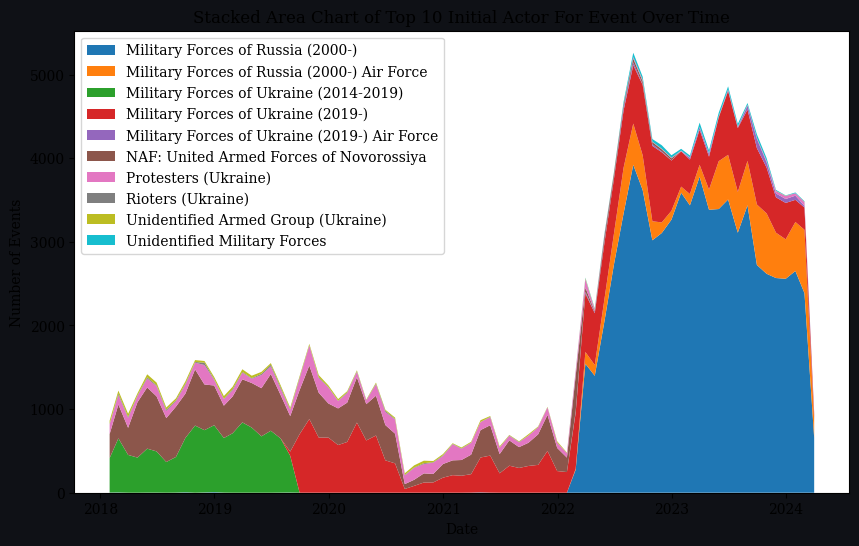

In [471]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Calculate the total number of events for each actor and choose top 10 actors
top_actors = data['ACTOR1'].value_counts().index[:10]
top_actors = data[data['ACTOR1'].isin(top_actors)]

# Group by actor and date, and count occurrences
actor_counts = top_actors.groupby(['ACTOR1', pd.Grouper(key='EVENT_DATE', freq='M')]).size()
actor_counts = actor_counts.unstack(level=0, fill_value=0) 

# Plotting the stacked area chart with the chosen colors
plt.figure(figsize=(10, 6))
plt.stackplot(actor_counts.index, [actor_counts[col] for col in actor_counts.columns], labels=actor_counts.columns)
plt.title('Stacked Area Chart of Top 10 Initial Actor For Event Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend(loc='upper left')
plt.show()


## 4. Genre. Which genre of data story did you use?
#### Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

To tell our story, we chose a magazine-style genre to present our data story effectively. To enhance the narrative with visual features, we explored various tools from the three categories of Visual Narative, these are:

**Consistent Visual Platform**: We maintained a consistent visual platform throughout our visualizations, ensuring that the design language and layout remained uniform. This consistency helps in maintaining a seamless narrative flow and making the interface intuitive for users, where the user just needs to familiarize themselves with the design once to navigate through the visualizations easily.

**Progress Bar / Timebar**: We used the Progress Bar / Timebar tool in our animated maps to help users understand the progression of data over time, giving them control over what exactly they want to see. This tool is particularly useful for visualizing temporal data and showing the change over time, allowing users to explore the data at their own pace.

**Feature Distinction**: We effectively used feature distinction in our visualizations to direct viewer attention. Different colors and styles were used to distinguish between various data points and types in our visualizations, such as different actors in the network graph or event types in line charts. This feature distinction helps in highlighting important information and making it stand out for the viewer.

**Motion**: We used motion in our interactive visualizations to draw attention to changes and relationships. Elements such as animations in the maps help in guiding the viewer through the data and highlighting important trends or patterns.

**Zooming**: We integrated zooming functionality in our visualizations (both in maps and network graph) to allow for detailed views of specific regions/actors. This improvement allows viewers to examine the data closely, regardless of its scale or level of detail. Zooming helps in providing a more interactive and engaging experience for users, allowing them to explore the data in more depth and gain insights into the dynamics of the conflicts.

**Animated Transitions**: The maps also offer a "play" button that animates the transitions between states, providing a smooth and engaging way to visualize the changes in the data over time. This animated transition again helps guide the viewer through the data and highlights the evolution of events, either the conflicts or fatalities in Ukraine and the Black Sea region

#### Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

To structure our narrative, we also utilized tools from the three categories of Narrative Structure, these are:

**User Directed Path**: In the interactive network graph and the detailed timeline slider on the map, users have the freedom to explore data points and connections as they see fit, which allows for a more exploratory interaction with the data. This enables users to go deeper into specific aspects of the data and follow their own narrative journey, motivating the engagement with the data story.

**Linear**: Nevertheless, the general flow of the website is linear, starting from an introduction, moving through various specific analyses like fatalities, responsibilities, and civilian impacts, guiding the user through a structured narrative journey. This linear structure helps in presenting the data story in a coherent and organized manner, ensuring that users can follow the narrative flow and understand the key insights and findings.

**Hover Highlighting / Details**: By allowing users to hover over elements in the different graphs, we provide a deeper engagement with the data. This interactivity tool helps in providing additional context and information about specific data points so that the user experience is better by enabling users to explore the data more thoroughly.

**Filtering / Selection / Search**: We used timeline sliders to give the user an option to filter for specific years. Also whenever there are more than one category plotted together, the users can select which categories they want to see, by clicking on the interactive legend. This enables them to filter on the categories they are interested in.

**Captions / Headlines**: Each section of our narrative is introduced and summarized with clear headlines and captions, framing the data stories and providing context. These captions help in guiding the user through the narrative and highlighting the key insights and findings in each section.

**Introductory text**: We also provide introductory text at the beginning of the narrative to set the context and introduce the topic to the user. This introductory text helps in providing background information and context to the data story, ensuring that users understand the significance of the data presented and the purpose of the analysis.

**Summary**: At the end of the narrative, we provide a summary, wrapping up the data story and reinforcing the main takeaways for the user. This summary helps in synthesizing the information presented and highlighting the key points for the user to remember.


## 5. Visualizations

- Explain the visualizations you've chosen.

- Why are they right for the story you want to tell?

## Bar chart and scatter plot

To start off the data story, we wanted to show the distribution of the number of events in the dataset. Both to give an idea of what type of events the dataset contains and to show which events show up the most often. Further we overlayed the number of fatalities on top of the bar chart as a scatter plot to show the relationship between the number of events and the number of fatalities. Each scatter point is also proportionally sized to the total number of fatalities, this means that the fatalities are encoded both by the position on the y-axis but also by the size of the circle. Using two different "dimensions" might help the user to see clearly and quickly as possible what is happenning in the plot.

In [472]:
def event_type_and_fatalities(data):
    event_fatalities = data.groupby('EVENT_TYPE')['FATALITIES'].sum().reset_index()

    # Filter out the Violence Against Civilians event type
    event_fatalities = event_fatalities[event_fatalities['EVENT_TYPE'] != 'Violence against civilians']

    # Also, count the number of occurrences for each event type
    event_counts = data['EVENT_TYPE'].value_counts().reset_index()
    event_counts.columns = ['EVENT_TYPE', 'COUNT']

    # Merge both dataframes to have counts and fatalities side by side
    event_summary = pd.merge(event_fatalities, event_counts, on='EVENT_TYPE')

    # Create a bar chart for the number of events
    fig = go.Figure(go.Bar(
        x=event_summary['EVENT_TYPE'],
        y=event_summary['COUNT'],
        name='Number of Events',
        marker=dict(color='lightslategray'),
        # hoverinfo='skip'  # Hides hover info for the bars
        hovertemplate="<b>%{x}</b><br>Number of Events: %{y}<extra></extra>"  # Custom hover text for bars

    ))

    # Add a scatter plot on top of the bar chart for fatalities
    fig.add_trace(go.Scatter(
        x=event_summary['EVENT_TYPE'],
        y=event_summary['FATALITIES'],  # Use actual fatalities for positioning
        mode='markers+text',  # Display markers with text
        marker=dict(
            # size=20,  # Fixed size or scale appropriately
            # scale appropriatelyt
            size=np.log(event_summary['FATALITIES']) * 3,
            color='red'
        ),
        text=event_summary['FATALITIES'],  # Fatalities count as text
        textposition='top center',  # Position text above the markers
        name='Fatalities',
        hovertemplate="<b>%{x}</b><br>Total Fatalities: %{y}<extra></extra>"  # Custom hover text for points

    ))

    # Update the layout to add titles and axis labels
    fig.update_layout(
        title='Impact of Different Conflict Events',
        xaxis=dict(title='Event Type'),
        yaxis=dict(title='Number of Events/Fatalities',
                   range=[0, max(event_summary['COUNT'].max(), event_summary['FATALITIES'].max()) + 50]),
        legend_title='Data Type',
        barmode='overlay'  # Ensures bars and scatter points share the same x-axis
    )

    return fig


# Call the function to create the plot
fig = event_type_and_fatalities(data)

fig.show()


## Fatalities Map

In [487]:
def fatailities_map(data, gdf):
    data = data[data['FATALITIES'] > 0]
    # order years
    data.sort_values('YEAR', inplace=True)

    scatter_geo = px.scatter_geo(
        data, lat='LATITUDE', lon='LONGITUDE', color='FATALITIES',
        size='FATALITIES',  # Use fatalities as size for emphasis
        animation_frame='YEAR',  
        title='Evolution of Fatalities in Conflict Events',
        size_max=15,  
        color_continuous_scale=px.colors.sequential.OrRd  # Use a red-orange color scale
    )
    scatter_geo.update_layout(
        autosize=True,
        height=700,
        geo=dict(
            center=dict(lat=47.2, lon=31.1),  
            scope='europe',  
            projection_scale=6,  
            bgcolor='rgba(0, 0, 0, 0)',  
        ),
        plot_bgcolor='rgba(0, 0, 0, 0)',  
        paper_bgcolor='rgba(0, 0, 0, 0)',  
        font=dict(color='white'),  
    )

    return scatter_geo

In [488]:
gdf = gpd.read_file('region.geojson')

fig = fatailities_map(data, gdf)
fig.show()

/var/folders/1g/nb69w5095276sxhrps7sndf80000gn/T/ipykernel_22665/3928331462.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/lukyrasocha/miniconda3/envs/02806-socialdata/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Undirected network graph

In this graph, we wanted to show the parties that are responsible for the casualties in the dataset. When utilising undirected graphs we can nicely display the complicated relationships between the actors and get a quick overview into the interconnections between them. 

We decided to encode the number of casualties of the conflict between two actors as the thickness of the edge to again gain a better view into the most violent relationships. Lastly, the node colour is determined by the TOTAL number of casualties, where the node initiated the conflict. This way the most violent actors are easily identified.

Please note, that to make the graph more readable, we decided to only include the top 40 actors in terms of casualties. This way we can focus on the most important relationships and not get lost in the complexity of the graph.

In [473]:
# Create a DataFrame for interactions with sum of fatalities
edges = data.groupby(['ACTOR1', 'ACTOR2'])['FATALITIES'].sum().reset_index()

# Filter edges to only include those with fatalities above a certain threshold and select top 20
threshold_fatalities = edges['FATALITIES'].quantile(0.90)  # Adjust threshold as needed
filtered_edges = edges[edges['FATALITIES'] > threshold_fatalities].nlargest(40, 'FATALITIES')

# Create the graph with filtered data
G = nx.from_pandas_edgelist(filtered_edges, 'ACTOR1', 'ACTOR2', ['FATALITIES'])

# Add attributes to each node.
for n in G.nodes():
    G.nodes[n]['name'] = n
    G.nodes[n]['fatalities_caused'] = data[data['ACTOR1'] == n]['FATALITIES'].sum()


def draw_graph(G):
    # Position nodes using the spring layout algorithm
    pos = nx.spring_layout(G, seed=22)

    # Draw nodes and edges and show weights
    viz = nxa.draw_networkx(G, pos=pos, edge_color='black',
                            node_color="fatalities_caused",
                            #node_size='degree:Q',
                            cmap='viridis',
                            # change node border color
                            width='FATALITIES:Q',
                            node_tooltip=['name', 'fatalities_caused'])

    return viz

In [474]:
graph_viz = draw_graph(G)
graph_viz

alt.LayerChart(...)

## Protests over time

In [475]:
# Evolution of protests over time
def plot_protests_over_time(data):
    # Filter the data for protests
    protests = data[data['EVENT_TYPE'] == 'Protests']

    # Group by year and month to count occurrences
    date_counts = protests.groupby([protests['EVENT_DATE'].dt.to_period('M')]).size().reset_index(name='COUNT')
    date_counts['EVENT_DATE'] = date_counts['EVENT_DATE'].dt.to_timestamp()

    # Create a line plot
    fig = px.line(date_counts, x='EVENT_DATE', y='COUNT',
                  title='Trends in Protests over Time',
                  labels={'EVENT_DATE': 'Date', 'COUNT': 'Number of Protests'})

    return fig

In [476]:
# Call the function to plot protests over time
fig = plot_protests_over_time(data)

fig.show()

## Jitter plot of events and times of the day

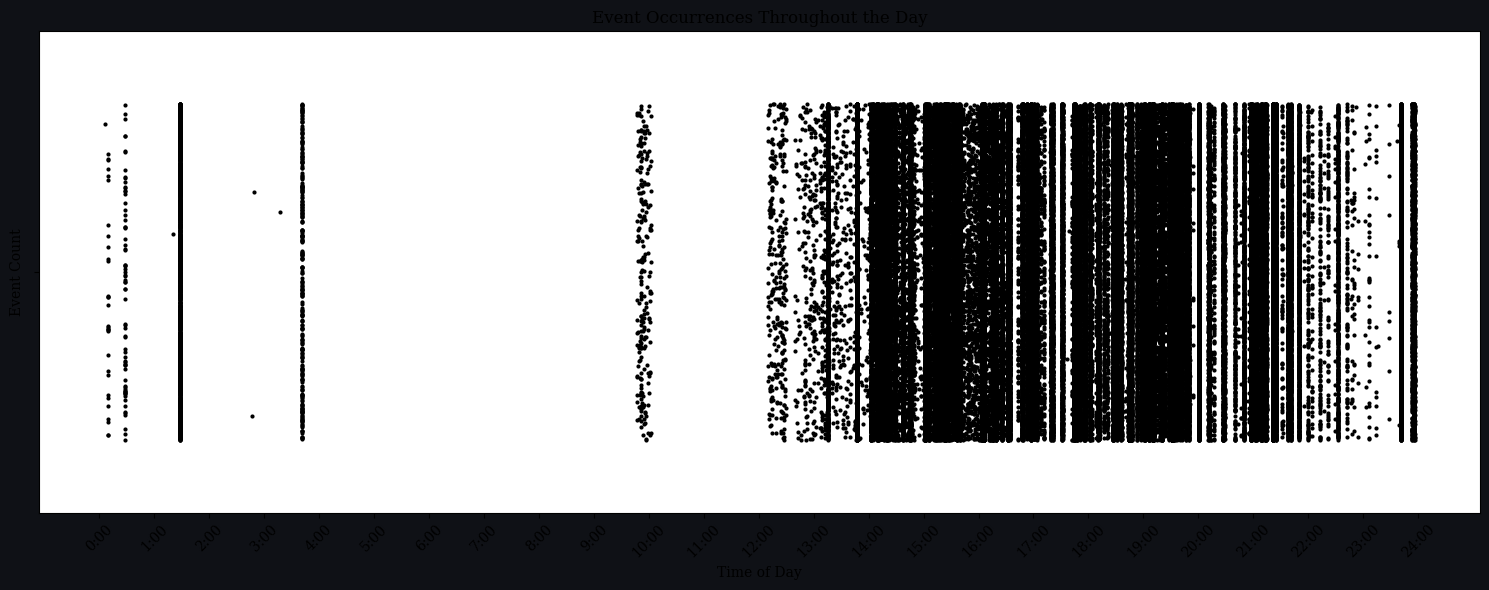

In [481]:
# Create a strip plot
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], unit='s')
data['MINUTE_OF_DAY'] = data['TIMESTAMP'].dt.hour * 60 + data['TIMESTAMP'].dt.minute


plt.figure(figsize=(15, 6))
strip_plot = sns.stripplot(x='MINUTE_OF_DAY', data=data, jitter=0.35, color="black", size=3)  # Adjust jitter for better visibility

# Setting up the plot title and labels
plt.title('Event Occurrences Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Event Count')


hour_ticks = range(0, 1441, 60)  
hour_labels = [f'{i}:00' for i in range(25)]  # Labels from '0:00' to '23:00'
plt.xticks(hour_ticks, hour_labels, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


## Spiral plots

In [478]:
total_fatalities = data['FATALITIES'].sum()
refugees = 6500000 # source https://data.unhcr.org/en/situations/ukraine

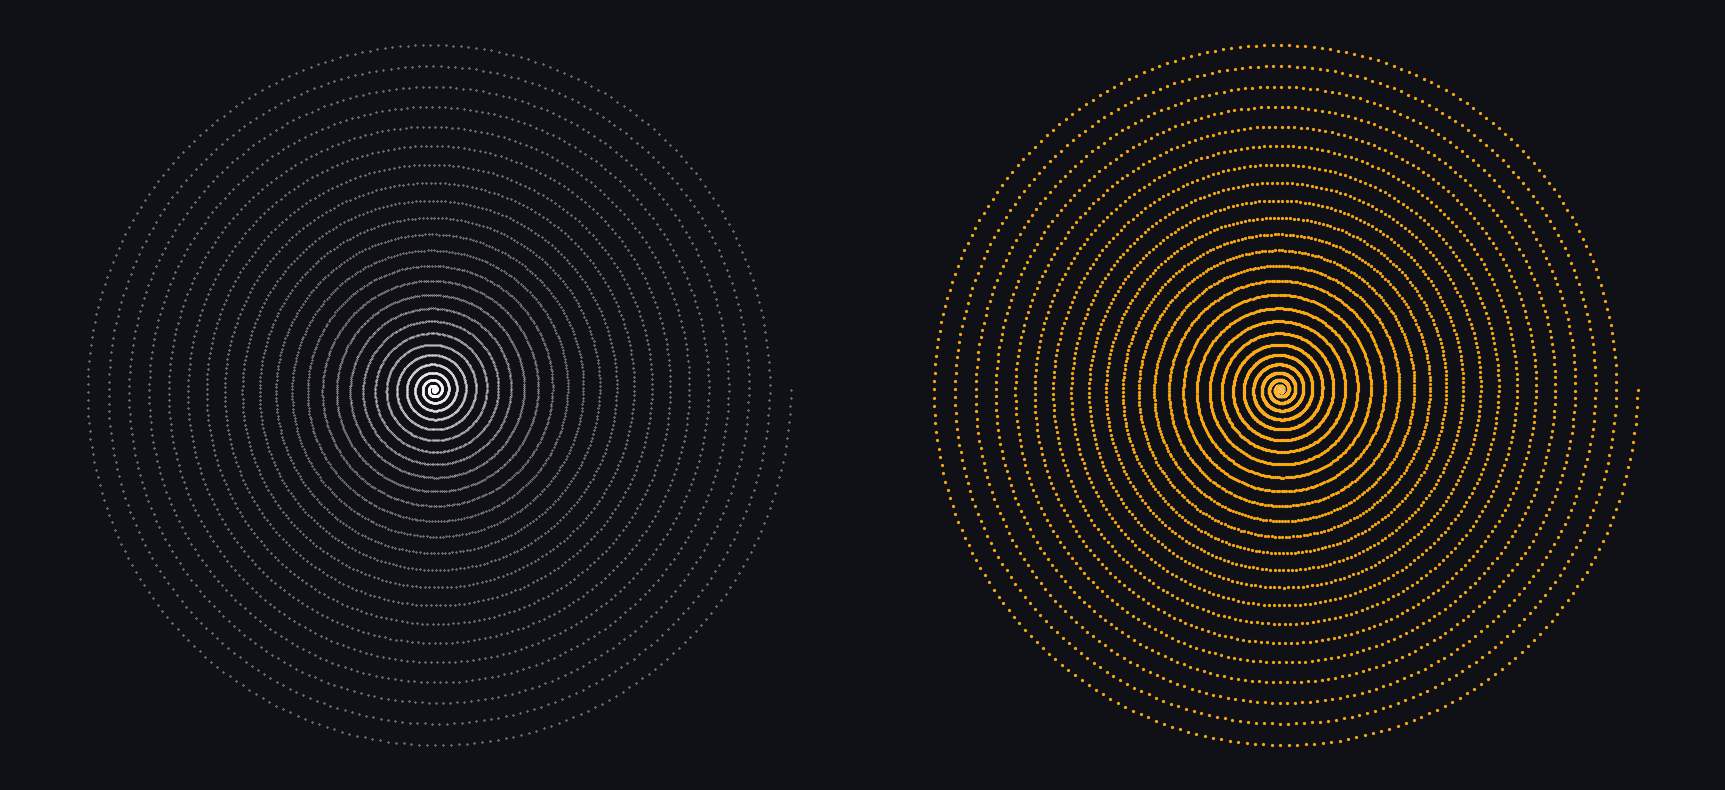

In [479]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral(n_points, rotations, max_radius):
    theta = np.linspace(0, rotations * np.pi, n_points)
    r = np.linspace(0, max_radius, n_points)**1.5  
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

def plot_dual_spirals(n_points1, rotations1, max_radius1, n_points2, rotations2, max_radius2, offset):
    x1, y1 = generate_spiral(n_points1, rotations1, max_radius1)
    x2, y2 = generate_spiral(n_points2, rotations2, max_radius2)
    
    x2 += offset

    plt.figure(figsize=(22, 10))  
    plt.scatter(x1, y1, s=0.1, c="red", edgecolors="white")  
    plt.scatter(x2, y2, s=5, color='orange', marker="o", edgecolors="white", linewidths=0.05)  # Plot second spiral in red for contrast
    plt.axis('off')  
    plt.show()

# Parameters for each spiral
n_points1 = 7016
rotations1 = 50
max_radius1 = 40

n_points2 = 6500
rotations2 = 50
max_radius2 = 40
offset = 600 

plot_dual_spirals(n_points1, rotations1, max_radius1, n_points2, rotations2, max_radius2, offset)


## 6. Discussion. Think critically about your creation
- What went well?

- What is still missing? What could be improved?, Why?

## 7. Contributions. Who did what?
- You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).

- It is not OK simply to write "All group members contributed equally".